In [ ]:
pip install iexfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 7.6 MB/s eta 0:00:00


In [ ]:
from iexfinance.stocks import Stock
iex_token = "sk_83a60cb54124422f9751f6f9e2402f34"
aapl = Stock("AAPL",token=iex_token)

,accountsPayable,capitalSurplus,commonStock,currency,currentAssets,currentCash,currentLongTermDebt,filingType,fiscalDate,fiscalQuarter,...,symbol,totalAssets,totalCurrentLiabilities,totalLiabilities,treasuryStock,id,key,subkey,date,updated
2023-05-05,42945000000,None,15787154000,USD,112913000000,55872000000,12574000000,10-Q,2023-04-01,2,...,AAPL,332160000000,120075000000,270002000000,0,BALANCE_SHEET,AAPL,quarterly,1680307200000,1686754897000


In [ ]:
from iexfinance.stocks import get_historical_data

from datetime import datetime

start = datetime(2023, 5, 10)

end = datetime(2023, 5, 17)

apple_may_price = get_historical_data('AAPL', start, end, output_format='pandas', token=iex_token)


In [ ]:
apple_may_price.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
2023-05-10,173.555,174.03,171.9,173.02,2023-05-10,AAPL,53724501,HISTORICAL_PRICES,AAPL,,...,171.9,53724501,172.542,173.076,173.55,171.425,53724501,"May 10, 23",1.785,0.0104
2023-05-11,173.75,174.59,172.17,173.85,2023-05-11,AAPL,49514676,HISTORICAL_PRICES,AAPL,,...,172.17,49514676,173.37,173.27,174.108,171.695,49514676,"May 11, 23",0.195,0.0011
2023-05-12,172.57,174.06,171,173.62,2023-05-12,AAPL,45533138,HISTORICAL_PRICES,AAPL,,...,171,45533138,173.62,172.57,174.06,171,45533138,"May 12, 23",-1.18,-0.0068
2023-05-15,172.07,173.21,171.47,173.16,2023-05-15,AAPL,37266659,HISTORICAL_PRICES,AAPL,,...,171.47,37266659,173.16,172.07,173.21,171.47,37266659,"May 15, 23",-0.5,-0.0029
2023-05-16,172.07,173.1383,171.7991,171.99,2023-05-16,AAPL,42110293,HISTORICAL_PRICES,AAPL,,...,171.7991,42110293,171.99,172.07,173.1383,171.7991,42110293,"May 16, 23",0,0


In [ ]:
apple_may_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-05-10 to 2023-05-17
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   close                 6 non-null      object
 1   high                  6 non-null      object
 2   low                   6 non-null      object
 3   open                  6 non-null      object
 4   priceDate             6 non-null      object
 5   symbol                6 non-null      object
 6   volume                6 non-null      object
 7   id                    6 non-null      object
 8   key                   6 non-null      object
 9   subkey                6 non-null      object
 10  updated               6 non-null      object
 11  changeOverTime        6 non-null      object
 12  marketChangeOverTime  6 non-null      object
 13  uOpen                 6 non-null      object
 14  uClose                6 non-null      object
 15  uHigh                 6

In [ ]:
apple_may_price.isnull().values.any()

False

In [ ]:
apple_may_price["maxHigh"] = max(apple_may_price['high'])
max(apple_may_price['high'])

174.59

In [ ]:
apple_may_price["minLow"] = min(apple_may_price['low'])
min(apple_may_price['low'])

170.4201

In [ ]:
apple_may_price["avgClose"] = apple_may_price['close'].mean(,)
apple_may_price['close'].mean()

172.78416666666666

In [ ]:
tesla_may_price = get_historical_data('TSLA', start, end, output_format='pandas', token=iex_token)


In [ ]:
tesla_may_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-05-10 to 2023-05-17
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   close                 6 non-null      object
 1   high                  6 non-null      object
 2   low                   6 non-null      object
 3   open                  6 non-null      object
 4   priceDate             6 non-null      object
 5   symbol                6 non-null      object
 6   volume                6 non-null      object
 7   id                    6 non-null      object
 8   key                   6 non-null      object
 9   subkey                6 non-null      object
 10  updated               6 non-null      object
 11  changeOverTime        6 non-null      object
 12  marketChangeOverTime  6 non-null      object
 13  uOpen                 6 non-null      object
 14  uClose                6 non-null      object
 15  uHigh                 6

In [ ]:
def standardize_data(x):

    minimum = x.min()
    maximum = x.max()
    true_value = x

    standard_value = (true_value - minimum) / (maximum - minimum)

    return standard_value

In [ ]:
tesla_may_price['standardizedClose'] = standardize_data(tesla_may_price['close'])

In [ ]:
apple_may_price['standardizedClose'] = standardize_data(apple_may_price['close'])

In [ ]:
tesla_may_price.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,norm,standardizedClose
2023-05-10,168.54,174.43,166.68,172.55,2023-05-10,TSLA,119840693,HISTORICAL_PRICES,TSLA,,...,172.55,168.54,174.43,166.68,119840693,"May 10, 23",-0.61,-0.0036,0.291611,0.291611
2023-05-11,172.08,173.57,166.79,168.7,2023-05-11,TSLA,103889930,HISTORICAL_PRICES,TSLA,,...,168.7,172.08,173.57,166.79,103889930,"May 11, 23",3.54,0.021,0.762983,0.762983
2023-05-12,167.98,177.38,167.23,176.07,2023-05-12,TSLA,157849625,HISTORICAL_PRICES,TSLA,,...,176.07,167.98,177.38,167.23,157849625,"May 12, 23",-4.1,-0.0238,0.217044,0.217044
2023-05-15,166.35,169.76,164.5499,167.655,2023-05-15,TSLA,105592510,HISTORICAL_PRICES,TSLA,,...,167.655,166.35,169.76,164.5499,105592510,"May 15, 23",-1.63,-0.0097,0.0,0.0
2023-05-16,166.52,169.5184,164.35,165.65,2023-05-16,TSLA,98288792,HISTORICAL_PRICES,TSLA,,...,165.65,166.52,169.5184,164.35,98288792,"May 16, 23",0.17,0.001,0.022636,0.022636


In [ ]:
apple_may_price.index

DatetimeIndex(['2023-05-10', '2023-05-11', '2023-05-12', '2023-05-15',
               '2023-05-16', '2023-05-17'],
              dtype='datetime64[ns]', freq=None)

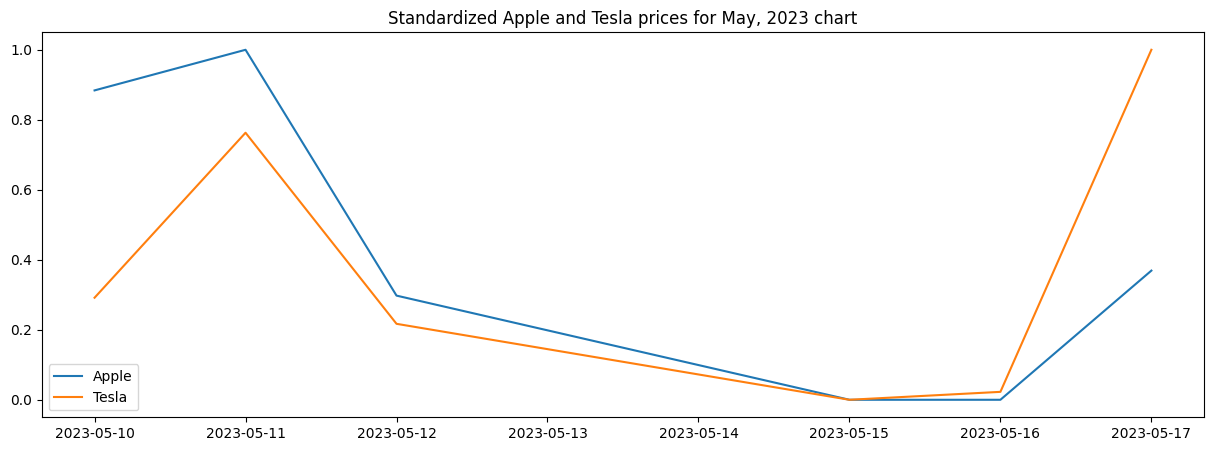

In [ ]:
import matplotlib.pyplot as plt

# plot normalized price chart
plt.figure(figsize=(15,5))
plt.title('Standardized Apple and Tesla prices for May, 2023 chart')
plt.plot(apple_may_price.index, apple_may_price['standardizedClose'], label="Apple")
plt.plot(tesla_may_price.index, tesla_may_price['standardizedClose'], label="Tesla")
plt.legend()
plt.show()

In [ ]:
income=aapl.get_income_statement()

In [ ]:
balance = aapl.get_balance_sheet()

,accountsPayable,capitalSurplus,commonStock,currency,currentAssets,currentCash,currentLongTermDebt,filingType,fiscalDate,fiscalQuarter,...,symbol,totalAssets,totalCurrentLiabilities,totalLiabilities,treasuryStock,id,key,subkey,date,updated
2023-05-05,42945000000,None,15787154000,USD,112913000000,55872000000,12574000000,10-Q,2023-04-01,2,...,AAPL,332160000000,120075000000,270002000000,0,BALANCE_SHEET,AAPL,quarterly,1680307200000,1686754897000


In [ ]:
cash = aapl.get_cash_flow()

In [ ]:
import pandas as pd
df2 = pd.merge(income, cash, on='reportDate')

In [ ]:
# Filter dataset to the necessary data points
income_filtered = income.drop(income.iloc[:, 1:3], inplace=True, axis=1)

balance_filtered = balance.drop(balance.iloc[:, 1:3], inplace=True, axis=1)

cash_filtered = cash.drop(cash.iloc[:, 1:3], inplace=True, axis=1)

# merging datasets based on shared column

df = pd.merge(income_filtered, balance_filtered, on='reportDate')
holistic_df = pd.merge(df, cash_filtered, on='reportDate')
